# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The white smart cab, which has a Udacity U painted on top of it, starts at a random position. The destination is visible as one big blue Udacity U in a random square. One game round is called a trial and the start and destination is randomly set. With every tick within a trial all other cars are moving in a seemingly random way. The smart cab does not move at all. The traffic lights are indicated by red lines blocking which block the cross traffic. Whenever the smart cab gets a red light, shown by the blocking red line, a positive reward between ~ +1.0 and ~ +3.0 ist given because it waited. If the not moving smart cab has green light with no oncoming traffice it gets a penalty between ~ -4.0 and ~ -6.0.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- There a several flags that change the simulation, for example:
    - `num_dummies` is used to set number of other cars / dummy agents, more cars will cause more traffic
    - `enforce_deadline` can be turned on or off and, when turned on, is starts the countdown that the smart cab has to reach it's destination
    - `update_delay` is a flag which is used to configure the time between the ticks - it does not change the simulation per se, but the speed at which it is run

- The dummy agent performs an action upon calling the function `act()` in the class `Environment`

- The `render()` function is used to update the gui of the game, whereas the `render_text()` function is used to log the game text-based on the console.

- In the `next_waypoint()` function of the `RoutePlanner` class the East-West direction is evaluated first.


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


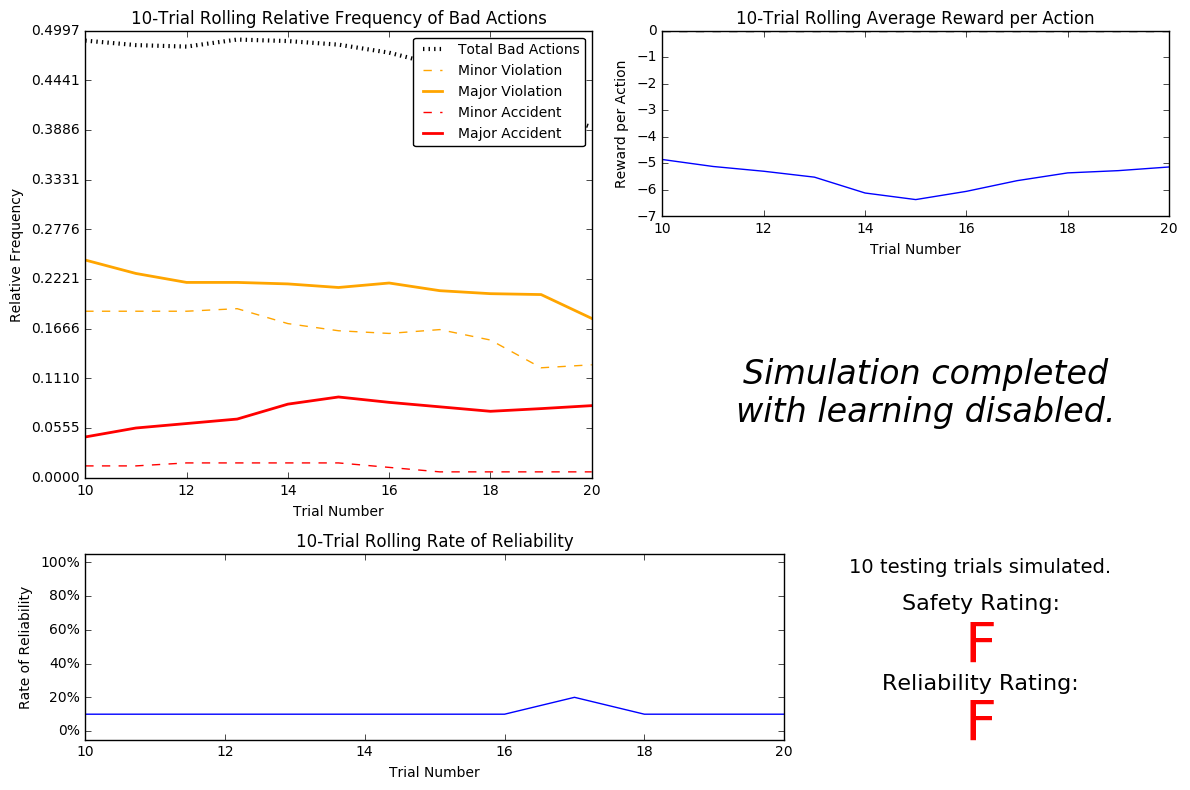

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

In training, almost 50% of all decisions are bad, from which every seventh one results in a major or minor accident, which is undesirable.

The bad rate of reliability makes perfect sense for the random driver, because reaching the goal, if ever, is pure luck.

The average reward points for the trials are around -5 and -6. There are small positive rewards, 0 to 2, for not violating traffic lights and slightly more, 2 to 3, if the correct way is taken. -5 points are given for iddling at green light and 10 negative points are given when the driver does not follow traffic lights and even more negative points, up to 40, when major accidents happen.

The results don't change significantly with increasing trials, they stay at a similar level.

The random driving agent got the worst safety and worst reliability rating possible.

This Smartcab cannot be called smart at all. Where is no guarranty, that it will ever reach it's destination and it is likely to be involved in an accident because it violates the traffic rules too often. Therefore it can't be considered safe nor reliable for passengers to use it.
 


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

Relevant environment informations:
- `'waypoint'`: needed to reach the destination, so it's relevant for efficiency
- `'inputs.light'`: without knowing the lights, the agent can't drive safely through a crossing
- `'inputs.left'`: in order to turn right at red light for more efficiency, the direction of left must not be `'oncoming'`
- `'inputs.oncoming'`: None or direction `'right'` in order to turn left increases safety
- `'inputs.right'`: if the smartcab intends to cross a red light for efficiency, it should be able to look right to prevent an accident for safety (remark: this will later not be used)

Unused environment information:
- `'deadline'`: agent is driving with safety first and making best effort to reach the destination in time, the deadline contains no information which could make the agent safer or more efficient.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

The state space of `'inputs.light, waypoint, inputs.left, inputs.right, inputs.oncoming' and agent.action` is ** 1536 = 2 \* 3 \* 4<sup>4</sup> **.

** 2 ** for the `red/green` light, ** 3 ** for three waypoint directions `forward/right/left` and ** ^4 ** directional types with ** 4 ** directions `forward/right/left/None`.

A trial has between 20 and 30 steps. Even if we always had 30 steps for all 20 trials we would end up with 600 situations to train the smartcab. So the 20 trials will not suffice to fully learn the policies for all possible states.

Later i will leave out `inputs.right` because it is anyway too dangerous to go forward or left into a red light. Also the information is not needed to turn right at green or red light. This reduces the space state by a factor of 4 down to **384**, and also significantly improves the ratings!

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

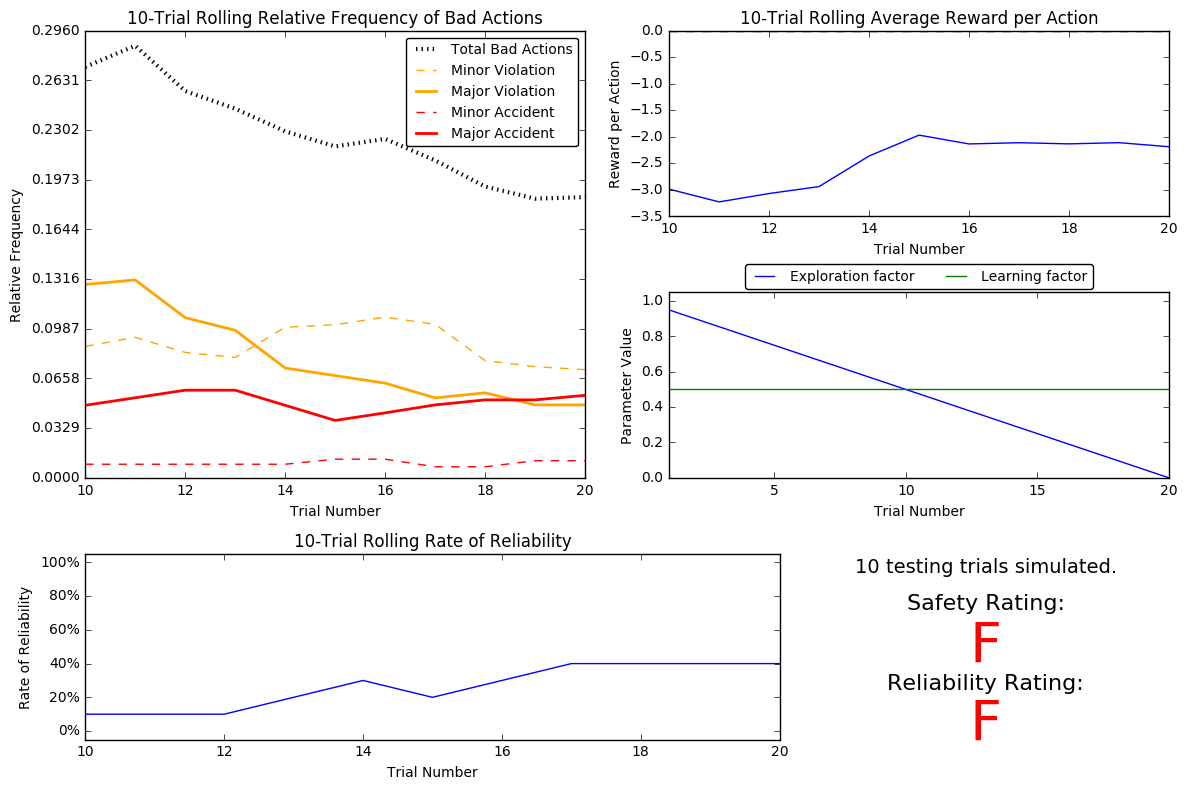

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

The analysis was made with state: `'inputs.light, waypoint, inputs.left, inputs.right and inputs.oncoming'` (if `'inputs.right'` is left out the, the ratings stay at F).

After training, approximately 20% of all decisions are bad, from which every 30th bad decision results in a major or minor accident, which is still undesirable.

The safety and reliability rating did not improve compared to the basic random driving agent, but that is the only thing that the two agents have in common.

There were 20 training trials before the tests, which is makes sense for a decay of epsilon of 0.05. The exploration factor takes 20 steps from 1 to 0 with a step size of 0.05, also visible as descending (blue) line.

The results significantly improve with increasing trials, the bad decisions become lower, the average reward score and the reliability increases.

This driving agent got the worst safety and worst reliability rating possible.

The rate of reliability has improved compared to the random driver, but it is still bad, maybe because the reward for taking the correct way is relatively low.
Also the safety did not improve, because the agent still produces accidents. Maybe more testing trials are required.

This Smartcab also cannot be called smart at all. Where is only small guarranty, that it will reach it's destination and it is likely to be involved in an accident because it violates the traffic rules too often. Therefore it can't be considered safe nor reliable for passengers to use it.

**Remark (with `input.right`):**
A very small step of 0.001 in the exploration factor will improve safety and reliability ratings, but overall training is very expensive because of too many trials:

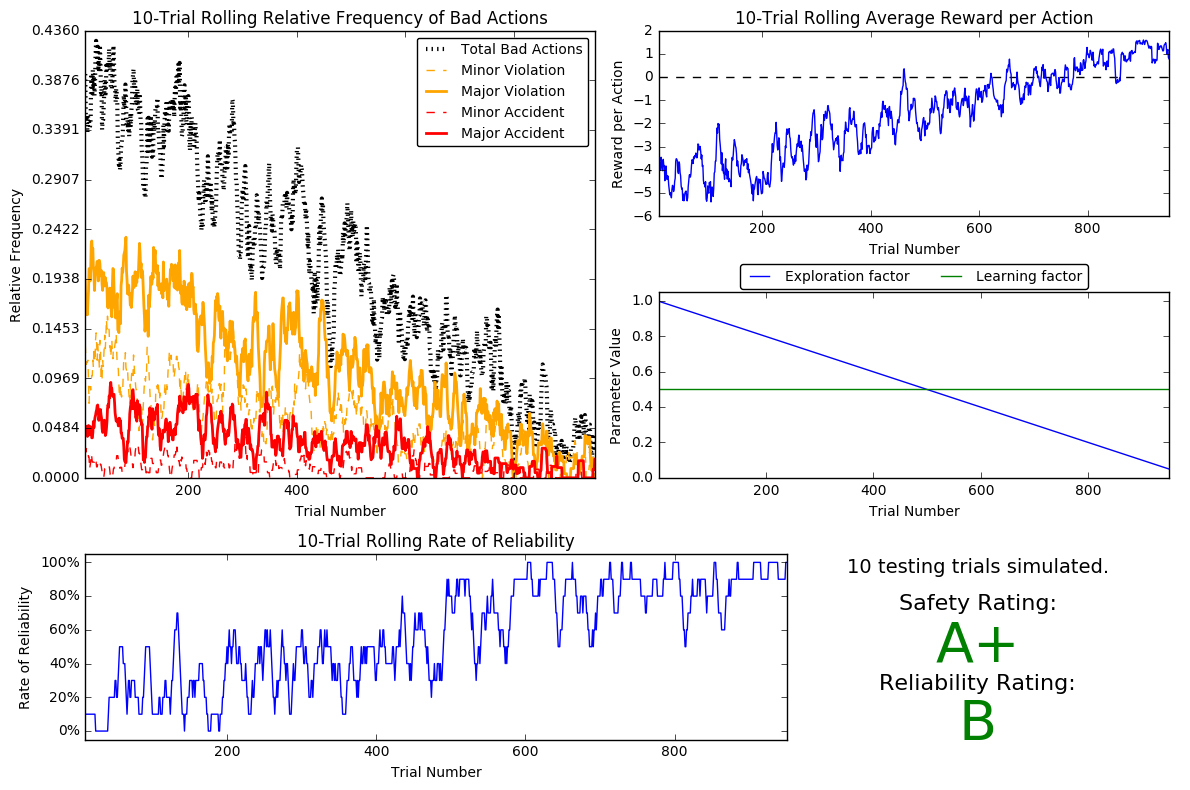

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning_eps_0.001.csv')

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

** Visualizing Decay Functions: **

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

**Decay Function 0: ** $ \epsilon_{t+1} = \epsilon_{t} - `epsilon\_step`, \hspace{10px}\textrm{for trial number } t$

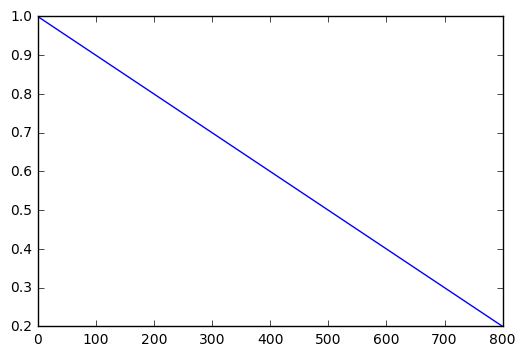

In [6]:
_ = plt.plot(np.fromiter((1.0 - x * 0.001 for x in range(800)), np.float))

**Decay Function 1: ** $ \epsilon = a^t, \textrm{for } 0 < a < 1 $

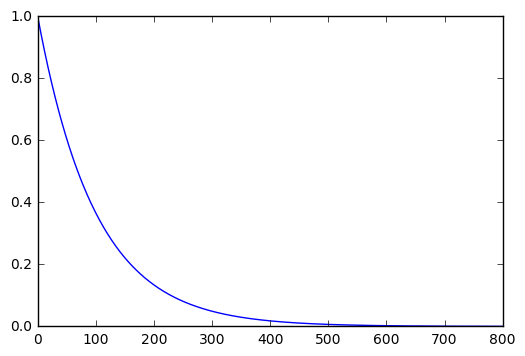

In [7]:
_ = plt.plot(np.fromiter((math.pow(0.99, x) for x in range(800)), np.float))

**Decay Function 2: ** $ \epsilon = \frac{1}{t^2} $

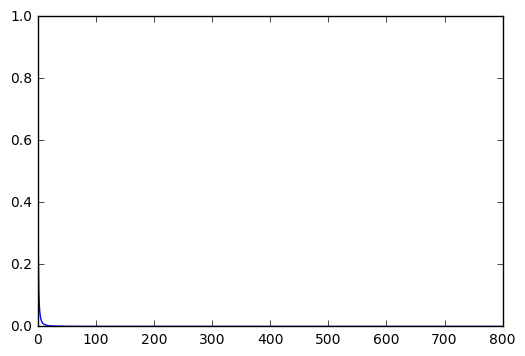

In [8]:
_ = plt.plot(np.fromiter(((1.0 / (x * x)) for x in range(1, 800)), np.float))

**Decay Function 3: ** $ \epsilon = e^{-at}, \textrm{for } 0 < a < 1 $

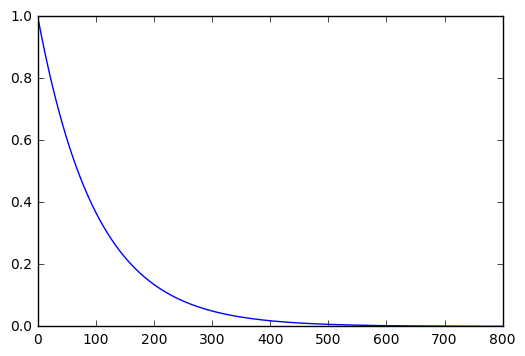

In [9]:
_ = plt.plot(np.fromiter((math.exp( 0.01 * x * (-1.0) ) for x in range(800)), np.float))

**Decay Function 4: ** $ \epsilon = \cos(at), \textrm{for } 0 < a < 1$

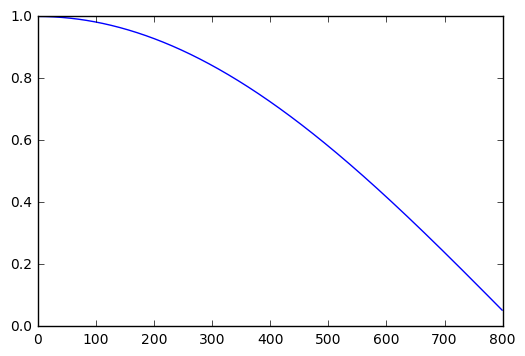

In [10]:
_ = plt.plot(np.fromiter((math.cos( 0.0019 * x) for x in range(800)), np.float))

**Decay Function 5: ** $ \epsilon = e^{-0.05 * \sqrt{t}} $

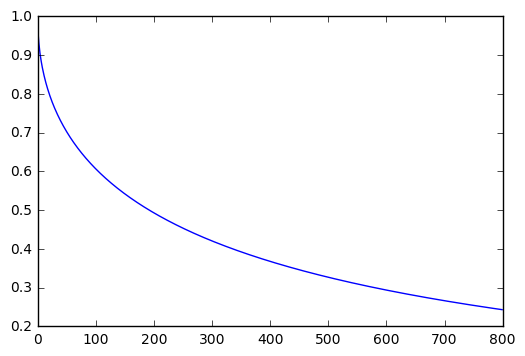

In [11]:
_ = plt.plot(np.fromiter((math.exp( math.sqrt(x) * (-0.05)) for x in range(800)), np.float))

**Hyper Parameters:**

- `epsilon`: between 0 and 1
- `epsilon_step`: between 0 and 1
- `alpha`: between 0 and 1
- `tolerance`: between 0 and 1
- `decay_function`:
    - 0:  $ \epsilon_{t+1} = \epsilon_{t} - `epsilon_step`, \hspace{10px}\textrm{for trial number } t$
    - 1:  $ \epsilon = a^t, \textrm{for } 0 < a < 1 $
    - 2:  $ \epsilon = \frac{1}{t^2} $
    - 3:  $ \epsilon = e^{-at}, \textrm{for } 0 < a < 1 $
    - 4:  $ \epsilon = \cos(at), \textrm{for } 0 < a < 1$
    - 5:  $ \epsilon = e^{-0.05 * \sqrt{t}} $

[markdown math formulas](http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/)

**Result Table WITH `input.right`: **

|`epsilon`|`epsilon_step`|`alpha`|`tolerance`|`decay_function`|#Trainings|Safety Rating|Reliability Rating|
|:-------:|:-----:|:-----:|:---------:|:--------------:|:-------:|:---------------:|:--------------------:|
|1.0|0.005|1.0|0.005|0|199|**D**|**A+**|
|1.0|0.004|1.0|0.004|0|249|**A**|**C**|
|1.0|0.0|0.99|0.05|1|299|**A**|**B**|
|1.0|0.0|0.99|0.0066|1|500|**F**|**B**|
|1.0|0.0|0.99|0.000325|1|800|**D**|**D**|
|1.0|0.0|0.003|0.3|3|402|**F**|**B**|
|1.0|0.0|0.01|0.1|3|231|**A+**|**D**|
|1.0|0.0|0.01|0.1|3|231|**A+**|**A**|
|1.0|0.0|0.01|0.000335|3|801|**A+**|**D**|
|1.0|0.0|0.01|0.01|4|157|**F**|**A+**|
|1.0|0.0|0.01|0.01|4|157|**F**|**D**|
|1.0|0.0|0.01|0.01|4|157|**D**|**A**|
|1.0|0.0|1.0|0.5|5|~200|**D**|**A**|
|1.0|0.0|0.1|0.4|5|336|**F**|**B**|
|1.0|0.0|1.0|0.4|5|336|**F**|**A+**|
|1.0|0.0|1.0|0.3|5|580|**C**|**B**|
|1.0|0.0|1.0|0.4|5|336|**F**|**A**|
|1.0|0.0|1.0|0.4|5|336|**A+**|**A+**|
|1.0|0.0|1.0|0.245|5|792|**A+**|**B**|

**Result Table WITHOUT `input.right`: **

|`epsilon`|`epsilon_step`|`alpha`|`tolerance`|`decay_function`|#Trainings|Safety Rating|Reliability Rating|Remark|
|:-------:|:-----:|:-----:|:---------:|:--------------:|:-------:|:---------------:|:--------------------:|:-----:|
|1.0|0.005|1.0|0.005|0|199|**A+**|**A**||
|1.0|0.0|0.99|0.13|1|204|**A+**|**D**||
|1.0|0.0|0.99|0.05|1|299|**A+**|**A+**||
|1.0|0.0|0.99|0.01|1|459|**A+**|**A**||
|1.0|0.0|1.0|0.000025|2|201|**A+**|**F**| safe but does not learn waypoints |
|1.0|0.0|1.0|0.0000063|2|399|**A+**|**F**| safe but does not learn waypoints |
|1.0|0.0|0.01|0.1|3|231|**A+**|**F**| safe but does not learn waypoints |
|1.0|0.0|0.01|0.01|4|157|**A+**|**B**||
|1.0|0.0|0.005|0.55|4|198|**F**|**A+**| **outlier!** |
|1.0|0.0|0.005|0.55|4|198|**A+**|**A+**| 1st repetition |
|1.0|0.0|0.005|0.55|4|198|**A+**|**A+**| 2nd repetition |
|**1.0**|**0.0**|**0.0075**|**0.07**|**4**|**201**|**A+**|**A+**| ** Improved Solution **|
|1.0|0.0|1.0|0.4|5|336|**A+**|**D**||

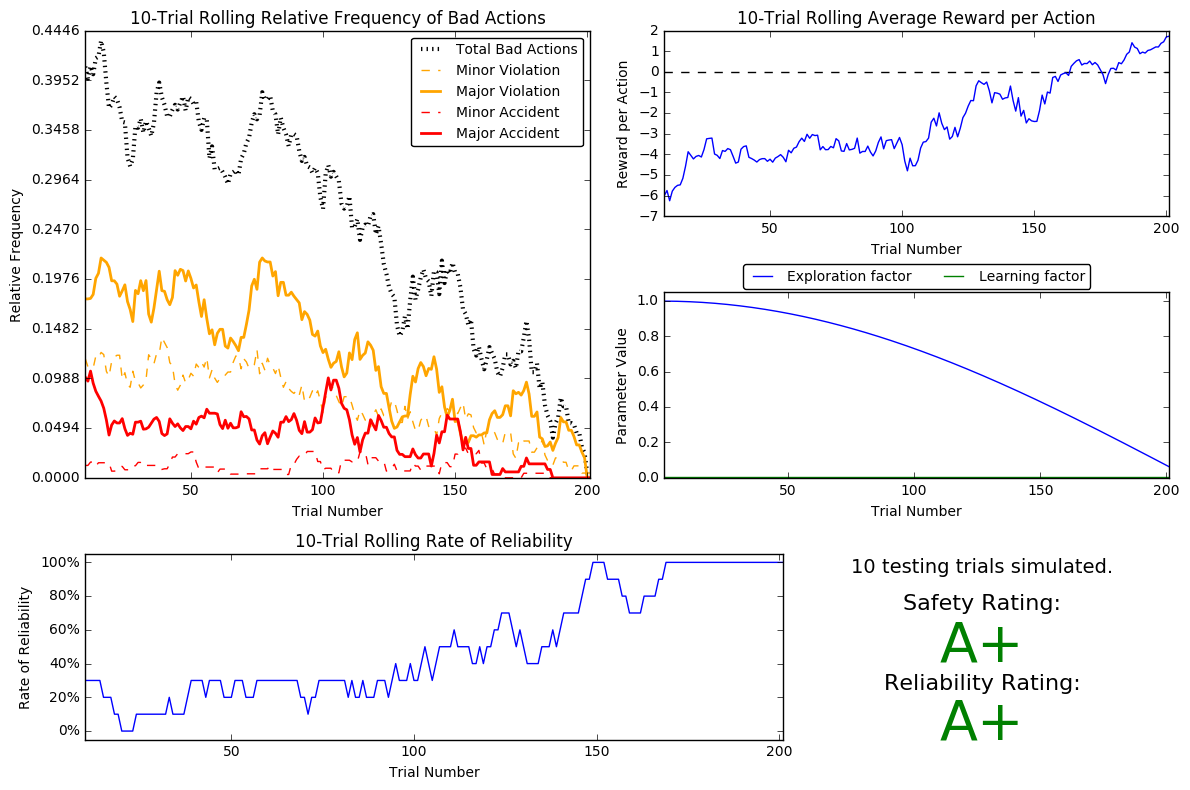

In [12]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

The final analysis was made with state: `'inputs.light, waypoint, inputs.left and inputs.oncoming'`.

After training, almost no decisions are bad.

The safety and reliability rating did improve a lot compared to the unoptimized driving agent.

There were 200 training trials before the tests, using the decay function 4:
$$ \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
which is visible as a descending (blue) curve.

This driving agent got the best safety and best reliability rating possible.

I used 0.0075 for alpha and 0.07 for the epsilon tolerance. I chose the values because they would produce a nice slowly descending curve from 1 downto 0 for approximately 200 training trials.

When looking at the Q-State Log, there seems to be an entry for every state and almost all actions have a value different from 0, which indicates that many actions have been tried out in training. Thus i would argue that the driving agent learned an appropriate policy.

This Smartcab can absolutely be called smart. Where is great chance, that it will reach it's destination in time and it is very likely to stay out of accidents because it violates the traffic rules very seldom. Therefore it can be considered safe and reliable for passengers to use it.

I like it.

Still I would feel better if the complete space state would be evaluated. There will be an example of why in the answer to question 8.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

Optimal Policy:

**General Rule:** The smartcab should **follow the waypoint** if traffic conditions are met **or wait**. This rule ensures the safety of the passengers, because the car will not cause accidents when obeying the traffic rules. It also makes the best effort for the smartcab to reach it's destination by following the waypoints.
- At **green light**:
    - if the waypoint shows any of it's possible actions `forward`, `left` or `right`, let the smartcab **take the suggested waypoint action**, because it is safe to do so and following the waypoint takes the agent one step towards it's goal
    - ~~if the waypoint shows `left` and there is no oncoming car which has a direction of `forward` or `right`: **turn left**. The constraint ensures the safety of the passenger and following the waypoint takes the agent one step towards it's goal~~ [1]
    - ~~else **idle**, nothing else to do~~ [1]
- At **red light**:
    - if the waypoint shows `right` and there is no other car coming from the left with a direction of `forward`: **turn right**. This constraint ensures the safety of the passenger and takes the agent one step towards it's goal.
    - else **idle**, because anything else would violate the traffic rules and endanger the passenger.

Analyzing `sim_improved-learning.txt`:

My state dictionary looks as follows:
```
(inputs['light'], waypoint, inputs['left'], inputs['oncoming'])
```

The policies in the log file always conform to the traffic rules. From the 48 situations with red traffic light, all of the policies either wait or 
Additionally the policies very often have an optimal action.

Correct and optimal policies for green light:
```
('green', 'forward', None, None)
 -- forward : 1.51
 -- right : 0.18
 -- None : -1.23
 -- left : 0.22

('green', 'left', 'forward', None)
 -- forward : 0.04
 -- right : 0.05
 -- None : -0.36
 -- left : 0.36
 
('green', 'right', 'left', None)
 -- forward : 0.05
 -- right : 0.30
 -- None : -0.44
 -- left : 0.04
```
Explanation: Given policies have the largest positive weight on the correct waypoint direction. Remark: The policies don't idle at green, which can be seen from the negative value for None.

Correct and optimal policies for red light:
```
('red', 'forward', 'left', 'forward')
 -- forward : -0.23
 -- right : 0.01
 -- None : 0.07
 -- left : -0.14

('red', 'left', 'forward', 'left')
 -- forward : -1.49
 -- right : -0.45
 -- None : 0.07
 -- left : -0.61
 
('red', 'right', 'forward', 'left')
 -- forward : -0.61
 -- right : -0.44
 -- None : 0.03
 -- left : -0.30
```
Explanation: the policies have the highest value at None which is correct and necessary to ensure safety. Note, that in the last case the policy is correct by letting the smartcab wait (cross traffic from left!) instead of turning right as suggested by the waypoint.

Correct and optimal policies for red light when waypoint direction is right:
```
('red', 'right', 'left', 'forward')
 -- forward : -0.16
 -- right : 0.11
 -- None : 0.01
 -- left : -0.74
```
Explanation: 

Examples of a correct but not optimal policy:
```
('green', 'forward', 'left', 'right')
 -- forward : 0.00
 -- right : 0.04
 -- None : -0.03
 -- left : 0.00
 
('red', 'left', 'left', 'left')
 -- forward : -0.44
 -- right : 0.04
 -- None : 0.01
 -- left : -0.45
```
Explanation: Moving `right` is safe to do, but because it moves the smartcab away from it's destination it is not optimal. This policy was developed because the correct action `forward` was never or seldom executed in training for these particular states.

One last example for the danger of not training the complete state space:
```
('red', 'right', 'right', 'forward')
 -- forward : -0.44
 -- right : 0.00
 -- None : 0.00
 -- left : -0.08
```
Explanation: the actions `right` and `None` have never been trained, so if the state would be slightly different, e.g.: `('red', 'right', 'forward', 'forward')`, then by taking the right action an accident would occur.

~~Heavy Traffic:~~

~~If traffic is too heavy, there is no guarranty that the smartcab will reach it's destination in time.~~

~~Think about following example where the smartcab is only one `left` turn away from it's final destination. If the light is green and there is always an oncoming car blocking the turn to the left, the smartcab will eventually stay at the crossroad for too long. If the light is red, the agent would have to violate the traffic rules, which is very very unlikely for a well trained agent.~~

~~A policy does not contain strategies for heavy traffic. A strategy for given example would be (obeying the traffic rules) move forward, turn right, turn right, turn right, move forward.~~ [1]

[1] constraint of caring about the oncoming traffic is not needed, the reason is hidden in the implementation detail of `environment.py`:
```
# Agent wants to drive left:
elif action == 'left':
    [...]
    else: # Green light
        heading = (heading[1], -heading[0]) # Valid move. We assume the cab will wait for the lane to be clear on a green light, before taking the left turn.
```


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

I can only take a guess:
- Smartcab: Rewards for reaching the destination in time could encourage the agent to commit traffic violations, e.g. crossing red light if there is no cross traffic from left and right.
- Environment: failing to reach the destination in time would give a negative reward which would invalidate otherwise safe and optimal driving. The traffic situation can change safety constraints, e.g. turning right and thus influence efficiency.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.